In [1]:
from google.colab import files
uploaded = files.upload()

Saving sorted_Obserevd_data_based_on_requriment.xls to sorted_Obserevd_data_based_on_requriment.xls


In [50]:
from google.colab import files
uploaded = files.upload()

Saving MME_Temperature_Minimum.csv to MME_Temperature_Minimum (1).csv


# Season wise **precipitation**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

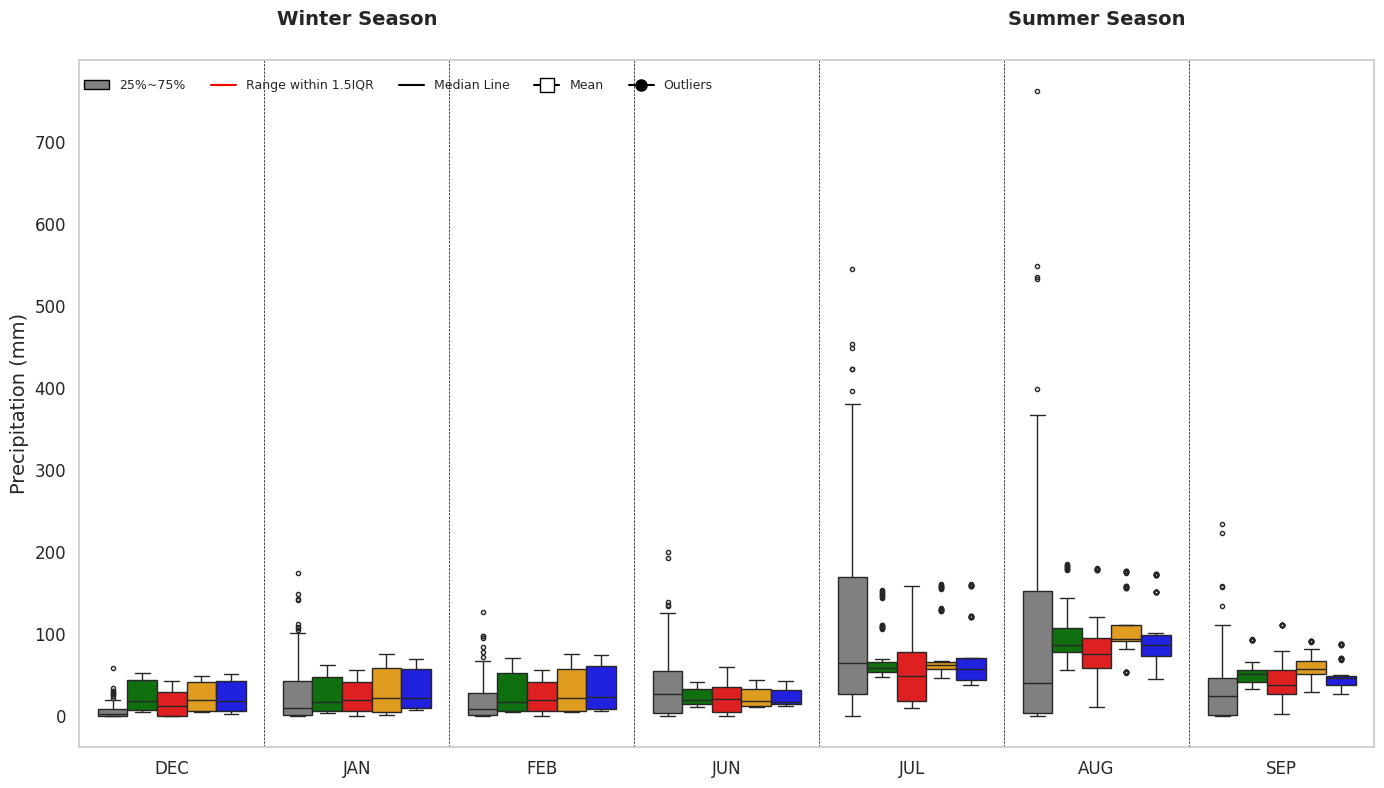

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Load the MME and observed data
mme_file_path = 'MME_precipitation_SSP1_2_3_5.csv'  # Replace with your MME file path
observed_file_path = 'sorted_Obserevd_data_based_on_requriment.xls'  # Replace with your Observed data file path

mme_data = pd.read_csv(mme_file_path)
observed_data = pd.read_excel(observed_file_path)

# Merge the data on Year, Month, and Station Name
merged_data = pd.merge(observed_data, mme_data, on=['Year', 'Month', 'Station Name'], how='inner')

# Ensure that the 'Month' column is categorized properly
month_order = ['DEC', 'JAN', 'FEB', 'JUN', 'JUL', 'AUG', 'SEP']
merged_data['Month'] = pd.Categorical(merged_data['Month'], categories=month_order, ordered=True)

# Filter data to only include the selected months
selected_months = ['DEC', 'JAN', 'FEB', 'JUN', 'JUL', 'AUG', 'SEP']
season_data = merged_data[merged_data['Month'].isin(selected_months)]

# Prepare the data for plotting
plot_data = pd.melt(
    season_data,
    id_vars=['Month'],
    value_vars=['Observed_Pr', 'Predicted_Pr_SSP1_2.6', 'Predicted_Pr_SSP2_4.5', 'Predicted_Pr_SSP3_7.0', 'Predicted_Pr_SSP5_8.5'],
    var_name='Scenario',
    value_name='Precipitation'
)

# Rename the scenarios for better labeling
plot_data['Scenario'] = plot_data['Scenario'].replace({
    'Observed_Pr': 'Observed',
    'Predicted_Pr_SSP2_4.5': 'SSP2-4.5',
    'Predicted_Pr_SSP5_8.5': 'SSP5-8.5',
    'Predicted_Pr_SSP3_7.0': 'SSP3-7.0',
    'Predicted_Pr_SSP1_2.6': 'SSP1-2.6'
})

# Create the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.boxplot(
    x='Month',
    y='Precipitation',
    hue='Scenario',
    data=plot_data,
    palette={'Observed': 'gray', 'SSP1-2.6': 'green', 'SSP2-4.5': 'red', 'SSP3-7.0': 'orange', 'SSP5-8.5': 'blue'},
    fliersize=3,
    width=0.8
)

# Customizing the first part of the legend (25%~75%, IQR, Median, Mean, Outliers)
legend_elements1 = [
    mpatches.Patch(facecolor='gray', edgecolor='black', label='25%~75%'),
    mlines.Line2D([0], [0], color='red', lw=1.5, label='Range within 1.5IQR', marker='_', markersize=10, markeredgewidth=1.5),
    mlines.Line2D([0], [0], color='black', lw=1.5, linestyle='-', label='Median Line'),
    mlines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', label='Mean', markersize=10),
    mlines.Line2D([0], [0], marker='o', color='black', markerfacecolor='black', label='Outliers', markersize=8)
]

# Add the first legend (statistical elements)
plt.legend(
    handles=legend_elements1,
    loc='upper left',
    bbox_to_anchor=(0, 0.98),  # Adjusted to be inside the plot
    ncol=len(legend_elements1),  # Arrange items in a single row
    borderaxespad=0.,
    frameon=False,
    fontsize=9
)
"""
# Customizing the second part of the legend (Scenarios)
legend_elements2 = plt.legend(
    title='',
    loc='upper right',
    frameon=False,
    fontsize=5,
    handles=[
        mpatches.Patch(facecolor='gray', label='Observed'),
        mpatches.Patch(facecolor='green', label='SSP1-2.6'),
        mpatches.Patch(facecolor='red', label='SSP2-4.5'),
        mpatches.Patch(facecolor='orange', label='SSP3-7.0'),
        mpatches.Patch(facecolor='blue', label='SSP5-8.5'),
    ]
)

# Add the second legend outside the plot to avoid overlap
plt.gca().add_artist(legend_elements2)
"""
# Customize the plot
plt.title('')
plt.xlabel('')
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(False)

# Add dashed lines between months
for i in range(1, len(selected_months)):
    plt.axvline(x=i-0.5, color='black', linestyle='--', linewidth=0.5)

# Add annotations for season labels
plt.text(1, plt.ylim()[1] + 50, 'Winter Season', ha='center', va='center', fontsize=14, weight='bold')
plt.text(5, plt.ylim()[1] + 50, 'Summer Season', ha='center', va='center', fontsize=14, weight='bold')

# Save and display the plot
plt.tight_layout()
plt.savefig('MME_Precipitation_Seasons.png', dpi=300)
files.download("MME_Precipitation_Seasons.png")
plt.show()




**Season wise Maximum temperature**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

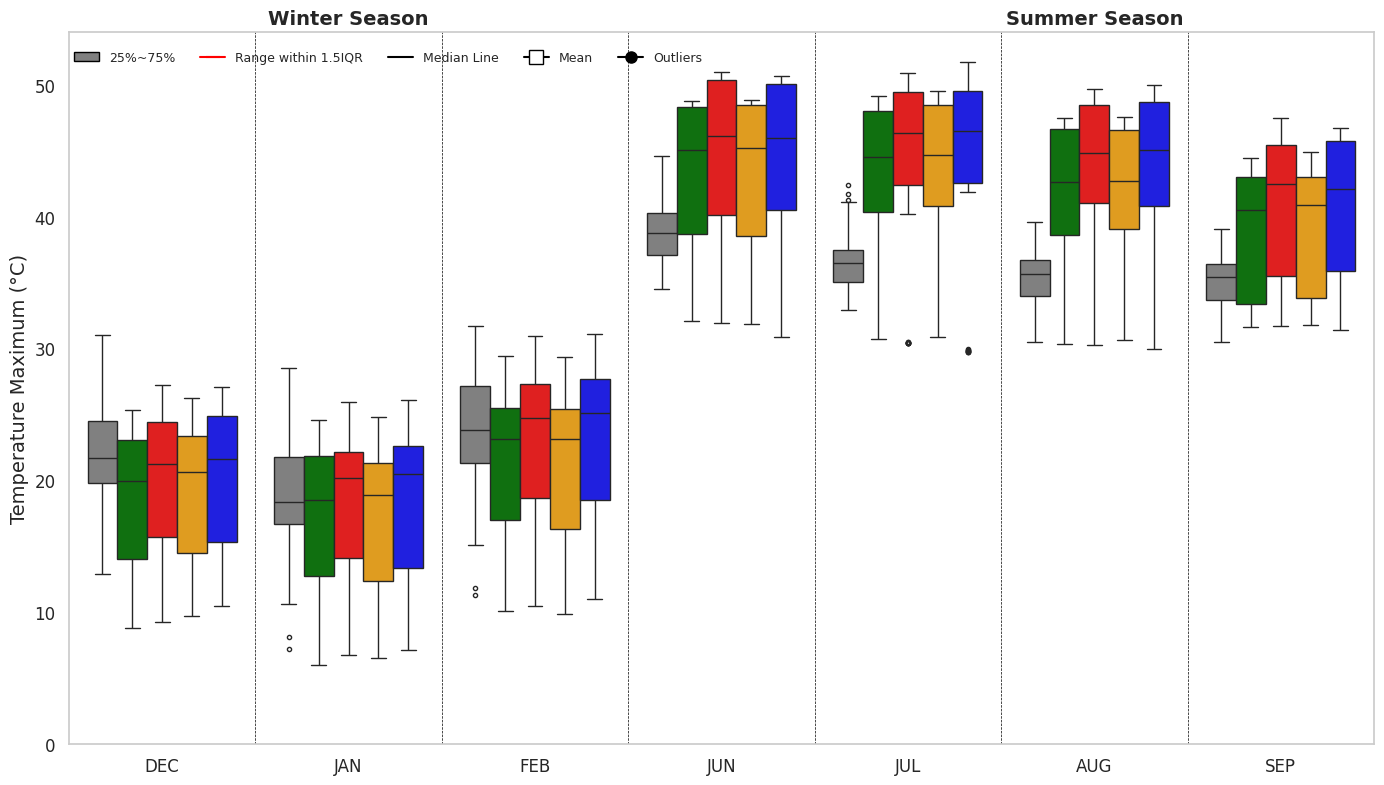

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Load the MME and observed data
mme_file_path = 'MME_Temperature_Maximum.csv'  # Replace with your MME file path
observed_file_path = 'sorted_Obserevd_data_based_on_requriment.xls'  # Replace with your Observed data file path

mme_data = pd.read_csv(mme_file_path)
observed_data = pd.read_excel(observed_file_path)

# Merge the data on Year, Month, and Station Name
merged_data = pd.merge(observed_data, mme_data, on=['Year', 'Month', 'Station Name'], how='inner')

# Ensure that the 'Month' column is categorized properly
month_order = ['DEC', 'JAN', 'FEB', 'JUN', 'JUL', 'AUG', 'SEP']
merged_data['Month'] = pd.Categorical(merged_data['Month'], categories=month_order, ordered=True)

# Filter data to only include the selected months
selected_months = ['DEC', 'JAN', 'FEB', 'JUN', 'JUL', 'AUG', 'SEP']
season_data = merged_data[merged_data['Month'].isin(selected_months)]

# Prepare the data for plotting
plot_data = pd.melt(
    season_data,
    id_vars=['Month'],
    value_vars=['Observed_Tmax', 'Predicted_Tmax_SSP1_2.6', 'Predicted_Tmax_SSP2_4.5', 'Predicted_Tmax_SSP3_7.0', 'Predicted_Tmax_SSP5_8.5'],
    var_name='Scenario',
    value_name='Temperature'
)

# Rename the scenarios for better labeling
plot_data['Scenario'] = plot_data['Scenario'].replace({
    'Observed_Tmax': 'Observed',
    'Predicted_Tmax_SSP2_4.5': 'SSP2-4.5',
    'Predicted_Tmax_SSP5_8.5': 'SSP5-8.5',
    'Predicted_Tmax_SSP3_7.0': 'SSP3-7.0',
    'Predicted_Tmax_SSP1_2.6': 'SSP1-2.6'
})

# Create the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.boxplot(
    x='Month',
    y='Temperature',
    hue='Scenario',
    data=plot_data,
    palette={'Observed': 'gray', 'SSP1-2.6': 'green', 'SSP2-4.5': 'red', 'SSP3-7.0': 'orange', 'SSP5-8.5': 'blue'},
    fliersize=3,
    width=0.8
)

# Customizing the first part of the legend (25%~75%, IQR, Median, Mean, Outliers)
legend_elements1 = [
    mpatches.Patch(facecolor='gray', edgecolor='black', label='25%~75%'),
    mlines.Line2D([0], [0], color='red', lw=1.5, label='Range within 1.5IQR', marker='_', markersize=10, markeredgewidth=1.5),
    mlines.Line2D([0], [0], color='black', lw=1.5, linestyle='-', label='Median Line'),
    mlines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', label='Mean', markersize=10),
    mlines.Line2D([0], [0], marker='o', color='black', markerfacecolor='black', label='Outliers', markersize=8)
]

# Add the first legend (statistical elements)
plt.legend(
    handles=legend_elements1,
    loc='upper left',
    bbox_to_anchor=(0, 0.98),  # Adjusted to be inside the plot
    ncol=len(legend_elements1),  # Arrange items in a single row
    borderaxespad=0.,
    frameon=False,
    fontsize=9
)

# Customize the plot
plt.title('')
plt.xlabel('')
plt.ylabel('Temperature Maximum (°C)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

# Set y-axis ticks to the specified range
plt.yticks(range(0, 55, 10), fontsize=12)

plt.grid(False)

# Add dashed lines between months
for i in range(1, len(selected_months)):
    plt.axvline(x=i-0.5, color='black', linestyle='--', linewidth=0.5)

# Add annotations for season labels
plt.text(1, plt.ylim()[1] + 1, 'Winter Season', ha='center', va='center', fontsize=14, weight='bold')
plt.text(5, plt.ylim()[1] + 1, 'Summer Season', ha='center', va='center', fontsize=14, weight='bold')

# Save and display the plot
plt.tight_layout()
plt.savefig('MME_Temperature_Maximum_Seasons.png', dpi=300)
files.download("MME_Temperature_Maximum_Seasons.png")
plt.show()




# **#Season wise Minimum temperature**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

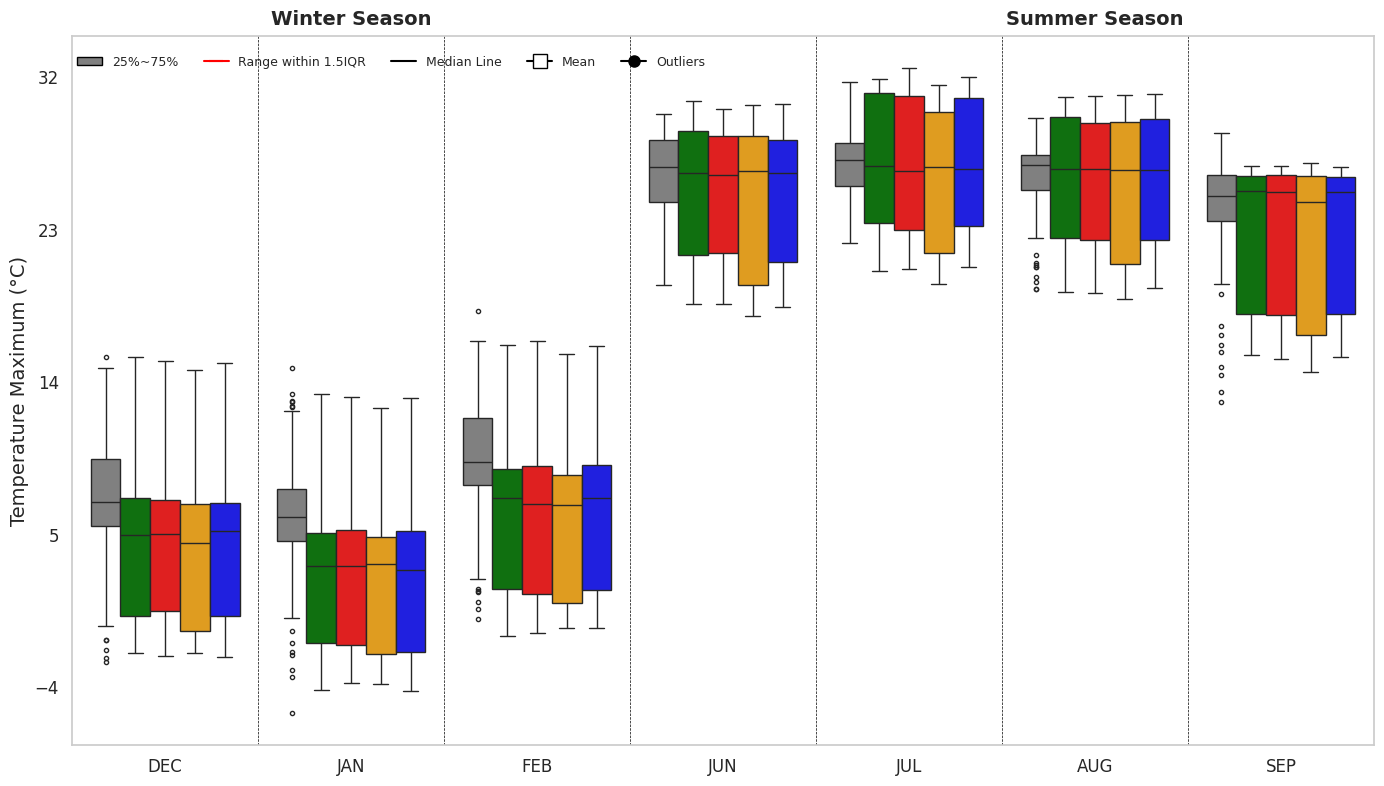

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Load the MME and observed data
mme_file_path = 'MME_Temperature_Minimum.csv'  # Replace with your MME file path
observed_file_path = 'sorted_Obserevd_data_based_on_requriment.xls'  # Replace with your Observed data file path

mme_data = pd.read_csv(mme_file_path)
observed_data = pd.read_excel(observed_file_path)

# Merge the data on Year, Month, and Station Name
merged_data = pd.merge(observed_data, mme_data, on=['Year', 'Month', 'Station Name'], how='inner')

# Ensure that the 'Month' column is categorized properly
month_order = ['DEC', 'JAN', 'FEB', 'JUN', 'JUL', 'AUG', 'SEP']
merged_data['Month'] = pd.Categorical(merged_data['Month'], categories=month_order, ordered=True)

# Filter data to only include the selected months
selected_months = ['DEC', 'JAN', 'FEB', 'JUN', 'JUL', 'AUG', 'SEP']
season_data = merged_data[merged_data['Month'].isin(selected_months)]

# Prepare the data for plotting
plot_data = pd.melt(
    season_data,
    id_vars=['Month'],
    value_vars=['Observed_Tmin', 'Predicted_Tmin_SSP1_2.6', 'Predicted_Tmin_SSP2_4.5', 'Predicted_Tmin_SSP3_7.0', 'Predicted_Tmin_SSP5_8.5'],
    var_name='Scenario',
    value_name='Temperature'
)

# Rename the scenarios for better labeling
plot_data['Scenario'] = plot_data['Scenario'].replace({
    'Observed_Tmin': 'Observed',
    'Predicted_Tmin_SSP2_4.5': 'SSP2-4.5',
    'Predicted_Tmin_SSP5_8.5': 'SSP5-8.5',
    'Predicted_Tmin_SSP3_7.0': 'SSP3-7.0',
    'Predicted_Tmin_SSP1_2.6': 'SSP1-2.6'
})

# Create the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.boxplot(
    x='Month',
    y='Temperature',
    hue='Scenario',
    data=plot_data,
    palette={'Observed': 'gray', 'SSP1-2.6': 'green', 'SSP2-4.5': 'red', 'SSP3-7.0': 'orange', 'SSP5-8.5': 'blue'},
    fliersize=3,
    width=0.8
)

# Customizing the first part of the legend (25%~75%, IQR, Median, Mean, Outliers)
legend_elements1 = [
    mpatches.Patch(facecolor='gray', edgecolor='black', label='25%~75%'),
    mlines.Line2D([0], [0], color='red', lw=1.5, label='Range within 1.5IQR', marker='_', markersize=10, markeredgewidth=1.5),
    mlines.Line2D([0], [0], color='black', lw=1.5, linestyle='-', label='Median Line'),
    mlines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', label='Mean', markersize=10),
    mlines.Line2D([0], [0], marker='o', color='black', markerfacecolor='black', label='Outliers', markersize=8)
]

# Add the first legend (statistical elements)
plt.legend(
    handles=legend_elements1,
    loc='upper left',
    bbox_to_anchor=(0, 0.98),  # Adjusted to be inside the plot
    ncol=len(legend_elements1),  # Arrange items in a single row
    borderaxespad=0.,
    frameon=False,
    fontsize=9
)

# Customize the plot
plt.title('')
plt.xlabel('')
plt.ylabel('Temperature Maximum (°C)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)

# Set y-axis ticks to the specified range
plt.yticks(range(-4, 40, 9), fontsize=12)

plt.grid(False)

# Add dashed lines between months
for i in range(1, len(selected_months)):
    plt.axvline(x=i-0.5, color='black', linestyle='--', linewidth=0.5)

# Add annotations for season labels
plt.text(1, plt.ylim()[1] + 1, 'Winter Season', ha='center', va='center', fontsize=14, weight='bold')
plt.text(5, plt.ylim()[1] + 1, 'Summer Season', ha='center', va='center', fontsize=14, weight='bold')

# Save and display the plot
plt.tight_layout()
plt.savefig('MME_Temperature_Minimum_Seasons.png', dpi=300)
files.download("MME_Temperature_Minimum_Seasons.png")
plt.show()


Percentage wise, precipitation

In [43]:
import pandas as pd

# Load the MME and observed data
mme_file_path = 'MME_precipitation_SSP1_2_3_5 (1).csv'  # Replace with your MME file path
observed_file_path = 'sorted_Obserevd_data_based_on_requriment.xls'  # Replace with your Observed data file path

mme_data = pd.read_csv(mme_file_path)
observed_data = pd.read_excel(observed_file_path)

# Merge the data on Year, Month, and Station Name
merged_data = pd.merge(observed_data, mme_data, on=['Year', 'Month', 'Station Name'], how='inner')

# Calculate the mean observed precipitation for each station
mean_observed = merged_data.groupby('Station Name')['Observed_Pr'].mean().reset_index()
mean_observed.rename(columns={'Observed_Pr': 'Mean_Observed'}, inplace=True)

# Calculate the mean predicted precipitation for each scenario for each station
mean_predicted = merged_data.groupby('Station Name')[['Predicted_Pr_SSP1_2.6', 'Predicted_Pr_SSP2_4.5', 'Predicted_Pr_SSP3_7.0', 'Predicted_Pr_SSP5_8.5']].mean().reset_index()

# Merge the observed and predicted means
merged_mean = pd.merge(mean_observed, mean_predicted, on='Station Name')

# Calculate the percentage change for each scenario
merged_mean['Perc_Change_SSP1_2.6'] = ((merged_mean['Predicted_Pr_SSP1_2.6'] - merged_mean['Mean_Observed']) / merged_mean['Mean_Observed']) * 100
merged_mean['Perc_Change_SSP2_4.5'] = ((merged_mean['Predicted_Pr_SSP2_4.5'] - merged_mean['Mean_Observed']) / merged_mean['Mean_Observed']) * 100
merged_mean['Perc_Change_SSP3_7.0'] = ((merged_mean['Predicted_Pr_SSP3_7.0'] - merged_mean['Mean_Observed']) / merged_mean['Mean_Observed']) * 100
merged_mean['Perc_Change_SSP5_8.5'] = ((merged_mean['Predicted_Pr_SSP5_8.5'] - merged_mean['Mean_Observed']) / merged_mean['Mean_Observed']) * 100

# Select relevant columns to display
results = merged_mean[['Station Name', 'Mean_Observed', 'Perc_Change_SSP1_2.6', 'Perc_Change_SSP2_4.5', 'Perc_Change_SSP3_7.0', 'Perc_Change_SSP5_8.5']]

# Display the results
print(results)

# If you want to save the results to a CSV file
results.to_csv('Precipitation_Percentage_Change.csv', index=False)
files.download("Precipitation_Percentage_Change.csv")

   Station Name  Mean_Observed  Perc_Change_SSP1_2.6  Perc_Change_SSP2_4.5  \
0    Bahawalpur      21.102296            -11.715118            -32.138636   
1    Faisalabad      37.053500            -28.046981            -20.907085   
2     Hyderabad      15.826296             52.189384            -34.178097   
3     Islamabad     110.714389            -40.613587            -42.622907   
4       Karachi      19.605370             27.837164            -51.740920   
5        Lahore      19.213889            127.956003            192.937489   
6       Larkana      19.611778             10.198688            -57.000883   
7        Multan      22.464259            -11.518912            -25.382945   
8      Peshawar      38.738537             29.971816             12.594587   
9        Quetta      19.631556             55.107937            -29.178344   
10     Sargodha      17.789815             51.805547             75.922105   
11      Sialkot      86.508981            -23.742304            

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
import pandas as pd

# Load the MME and observed data
mme_file_path = 'MME_Temperature_Maximum (1).csv'  # Replace with your MME file path
observed_file_path = 'sorted_Obserevd_data_based_on_requriment.xls'  # Replace with your Observed data file path

mme_data = pd.read_csv(mme_file_path)
observed_data = pd.read_excel(observed_file_path)

# Merge the data on Year, Month, and Station Name
merged_data = pd.merge(observed_data, mme_data, on=['Year', 'Month', 'Station Name'], how='inner')

# Calculate the annual average observed Tmax for each station
annual_avg_observed = merged_data.groupby(['Station Name', 'Year'])['Observed_Tmax'].mean().reset_index()
annual_avg_observed = annual_avg_observed.groupby('Station Name')['Observed_Tmax'].mean().reset_index()
annual_avg_observed.rename(columns={'Observed_Tmax': 'Annual_Avg_Observed_Tmax'}, inplace=True)

# Calculate the annual average predicted Tmax for each scenario for each station
annual_avg_predicted = merged_data.groupby(['Station Name', 'Year'])[['Predicted_Tmax_SSP1_2.6', 'Predicted_Tmax_SSP2_4.5', 'Predicted_Tmax_SSP3_7.0', 'Predicted_Tmax_SSP5_8.5']].mean().reset_index()
annual_avg_predicted = annual_avg_predicted.groupby('Station Name').mean().reset_index()

# Merge the observed and predicted annual averages
merged_avg = pd.merge(annual_avg_observed, annual_avg_predicted, on='Station Name')

# Calculate the degree change for each scenario
merged_avg['Degree_Change_SSP1_2.6'] = merged_avg['Predicted_Tmax_SSP1_2.6'] - merged_avg['Annual_Avg_Observed_Tmax']
merged_avg['Degree_Change_SSP2_4.5'] = merged_avg['Predicted_Tmax_SSP2_4.5'] - merged_avg['Annual_Avg_Observed_Tmax']
merged_avg['Degree_Change_SSP3_7.0'] = merged_avg['Predicted_Tmax_SSP3_7.0'] - merged_avg['Annual_Avg_Observed_Tmax']
merged_avg['Degree_Change_SSP5_8.5'] = merged_avg['Predicted_Tmax_SSP5_8.5'] - merged_avg['Annual_Avg_Observed_Tmax']

# Calculate the percentage change for each scenario
merged_avg['Perc_Change_SSP1_2.6'] = (merged_avg['Degree_Change_SSP1_2.6'] / merged_avg['Annual_Avg_Observed_Tmax']) * 100
merged_avg['Perc_Change_SSP2_4.5'] = (merged_avg['Degree_Change_SSP2_4.5'] / merged_avg['Annual_Avg_Observed_Tmax']) * 100
merged_avg['Perc_Change_SSP3_7.0'] = (merged_avg['Degree_Change_SSP3_7.0'] / merged_avg['Annual_Avg_Observed_Tmax']) * 100
merged_avg['Perc_Change_SSP5_8.5'] = (merged_avg['Degree_Change_SSP5_8.5'] / merged_avg['Annual_Avg_Observed_Tmax']) * 100

# Select relevant columns to display
results = merged_avg[['Station Name', 'Annual_Avg_Observed_Tmax', 'Degree_Change_SSP1_2.6', 'Perc_Change_SSP1_2.6',
                       'Degree_Change_SSP2_4.5', 'Perc_Change_SSP2_4.5',
                       'Degree_Change_SSP3_7.0', 'Perc_Change_SSP3_7.0',
                       'Degree_Change_SSP5_8.5', 'Perc_Change_SSP5_8.5']]

# Display the results
print(results)

# If you want to save the results to a CSV file
results.to_csv('Temperature_Maximum_Change.csv', index=False)

files.download("Temperature_Maximum_Change.csv")



   Station Name  Annual_Avg_Observed_Tmax  Degree_Change_SSP1_2.6  \
0    Bahawalpur                 32.712037                3.632622   
1    Faisalabad                 31.081481                4.190458   
2     Hyderabad                 34.163889                2.893894   
3     Islamabad                 28.617593               -5.405025   
4       Karachi                 33.027778               -4.312715   
5        Lahore                 30.456481                0.707193   
6       Larkana                 34.500926                2.839954   
7        Multan                 31.907407                4.244593   
8      Peshawar                 29.428704               -5.199732   
9        Quetta                 25.258333                3.775057   
10     Sargodha                 30.662963                4.167729   
11      Sialkot                 29.388889                2.335185   

    Perc_Change_SSP1_2.6  Degree_Change_SSP2_4.5  Perc_Change_SSP2_4.5  \
0              11.104848    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***For minimum temprature***
```



In [51]:
import pandas as pd

# Load the MME and observed data
mme_file_path = 'MME_Temperature_Minimum (1).csv'  # Replace with your MME file path
observed_file_path = 'sorted_Obserevd_data_based_on_requriment.xls'  # Replace with your Observed data file path

mme_data = pd.read_csv(mme_file_path)
observed_data = pd.read_excel(observed_file_path)

# Merge the data on Year, Month, and Station Name
merged_data = pd.merge(observed_data, mme_data, on=['Year', 'Month', 'Station Name'], how='inner')

# Calculate the annual average observed Tmax for each station
annual_avg_observed = merged_data.groupby(['Station Name', 'Year'])['Observed_Tmin'].mean().reset_index()
annual_avg_observed = annual_avg_observed.groupby('Station Name')['Observed_Tmin'].mean().reset_index()
annual_avg_observed.rename(columns={'Observed_Tmin': 'Annual_Avg_Observed_Tmin'}, inplace=True)

# Calculate the annual average predicted Tmax for each scenario for each station
annual_avg_predicted = merged_data.groupby(['Station Name', 'Year'])[['Predicted_Tmin_SSP1_2.6', 'Predicted_Tmin_SSP2_4.5', 'Predicted_Tmin_SSP3_7.0', 'Predicted_Tmin_SSP5_8.5']].mean().reset_index()
annual_avg_predicted = annual_avg_predicted.groupby('Station Name').mean().reset_index()

# Merge the observed and predicted annual averages
merged_avg = pd.merge(annual_avg_observed, annual_avg_predicted, on='Station Name')

# Calculate the degree change for each scenario
merged_avg['Degree_Change_SSP1_2.6'] = merged_avg['Predicted_Tmin_SSP1_2.6'] - merged_avg['Annual_Avg_Observed_Tmin']
merged_avg['Degree_Change_SSP2_4.5'] = merged_avg['Predicted_Tmin_SSP2_4.5'] - merged_avg['Annual_Avg_Observed_Tmin']
merged_avg['Degree_Change_SSP3_7.0'] = merged_avg['Predicted_Tmin_SSP3_7.0'] - merged_avg['Annual_Avg_Observed_Tmin']
merged_avg['Degree_Change_SSP5_8.5'] = merged_avg['Predicted_Tmin_SSP5_8.5'] - merged_avg['Annual_Avg_Observed_Tmin']

# Calculate the percentage change for each scenario
merged_avg['Perc_Change_SSP1_2.6'] = (merged_avg['Degree_Change_SSP1_2.6'] / merged_avg['Annual_Avg_Observed_Tmin']) * 100
merged_avg['Perc_Change_SSP2_4.5'] = (merged_avg['Degree_Change_SSP2_4.5'] / merged_avg['Annual_Avg_Observed_Tmin']) * 100
merged_avg['Perc_Change_SSP3_7.0'] = (merged_avg['Degree_Change_SSP3_7.0'] / merged_avg['Annual_Avg_Observed_Tmin']) * 100
merged_avg['Perc_Change_SSP5_8.5'] = (merged_avg['Degree_Change_SSP5_8.5'] / merged_avg['Annual_Avg_Observed_Tmin']) * 100

# Select relevant columns to display
results = merged_avg[['Station Name', 'Annual_Avg_Observed_Tmin', 'Degree_Change_SSP1_2.6', 'Perc_Change_SSP1_2.6',
                       'Degree_Change_SSP2_4.5', 'Perc_Change_SSP2_4.5',
                       'Degree_Change_SSP3_7.0', 'Perc_Change_SSP3_7.0',
                       'Degree_Change_SSP5_8.5', 'Perc_Change_SSP5_8.5']]

# Display the results
print(results)

# If you want to save the results to a CSV file
results.to_csv('Temperature_Minimum_Change.csv', index=False)

files.download("Temperature_Minimum_Change.csv")

   Station Name  Annual_Avg_Observed_Tmin  Degree_Change_SSP1_2.6  \
0    Bahawalpur                 19.048148               -0.219603   
1    Faisalabad                 18.462963                0.097382   
2     Hyderabad                 21.121296               -1.294267   
3     Islamabad                 14.165741               -2.668178   
4       Karachi                 22.317593               -0.685102   
5        Lahore                 19.213889               -2.258658   
6       Larkana                 20.832407               -1.920478   
7      Peshawar                 17.087037               -7.308326   
8        Quetta                 10.524074               -1.516373   
9      Sargodha                 17.789815               -0.335743   
10      Sialkot                 17.102778               -3.491297   

    Perc_Change_SSP1_2.6  Degree_Change_SSP2_4.5  Perc_Change_SSP2_4.5  \
0              -1.152886               -0.436531             -2.291722   
1               0.52744

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>